Accuracy: 0.4666666666666667
Precision: 0.42857142857142855
Recall: 0.38028169014084506
F1 Score: 0.40298507462686567
AUC-ROC: 0.4622927438045997
Cross-Validation AUC-ROC Scores: [0.49346405 0.49203431 0.53189532 0.45839297 0.44641376]
Mean AUC-ROC: 0.48444008302564534
Standard Deviation of AUC-ROC: 0.030051811430036282


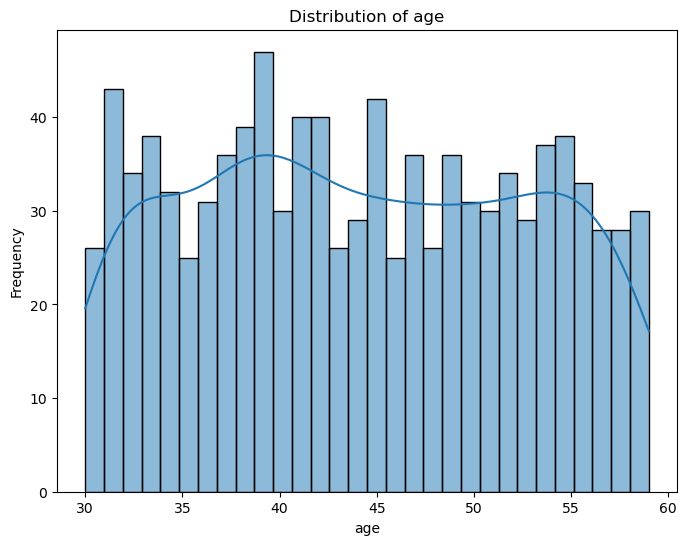

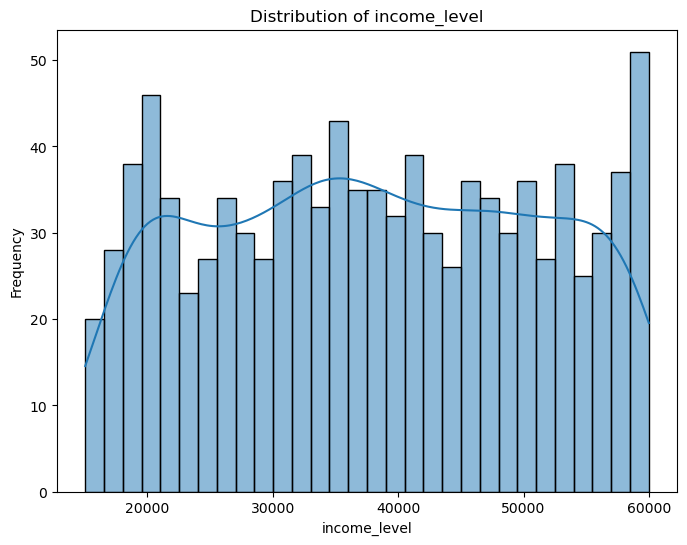

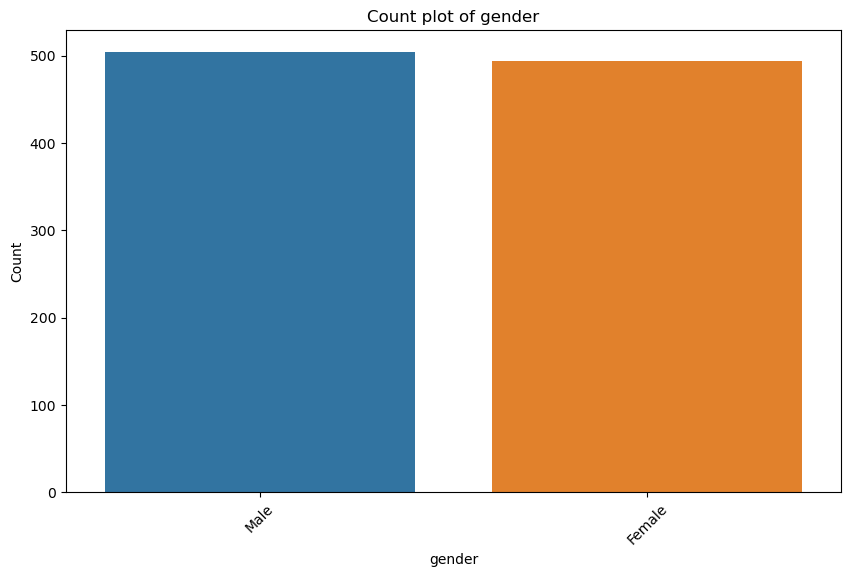

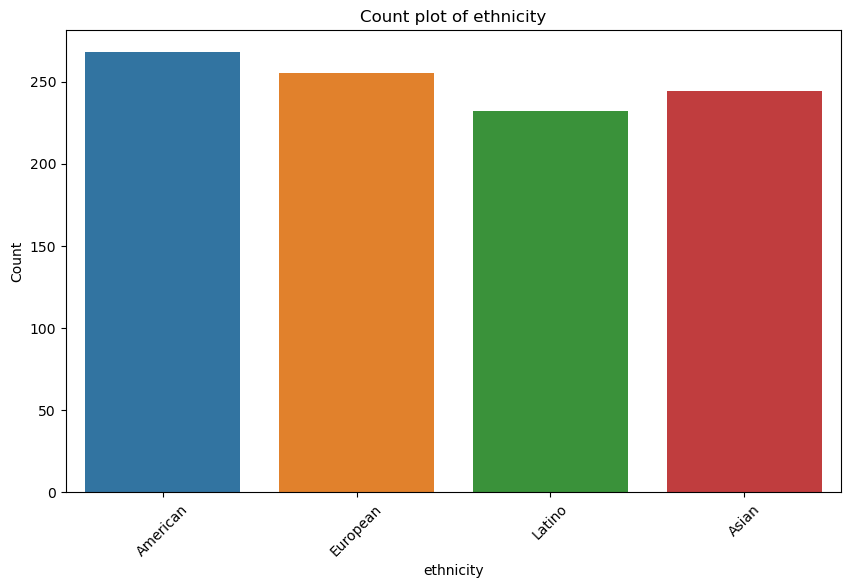

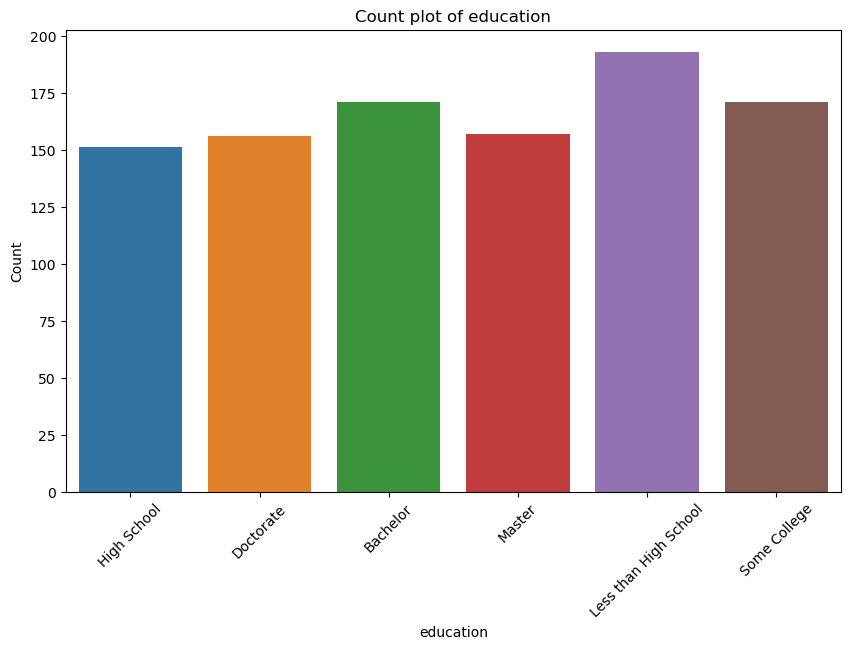

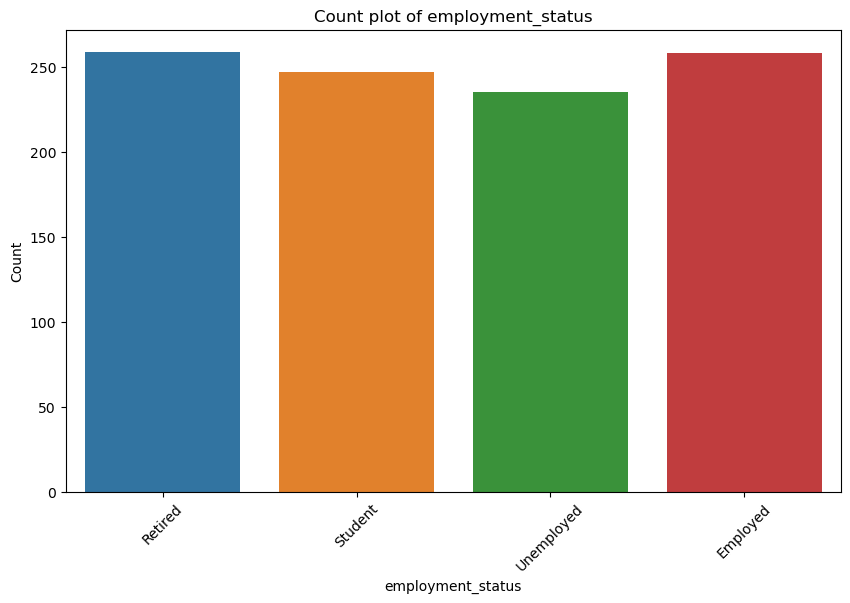

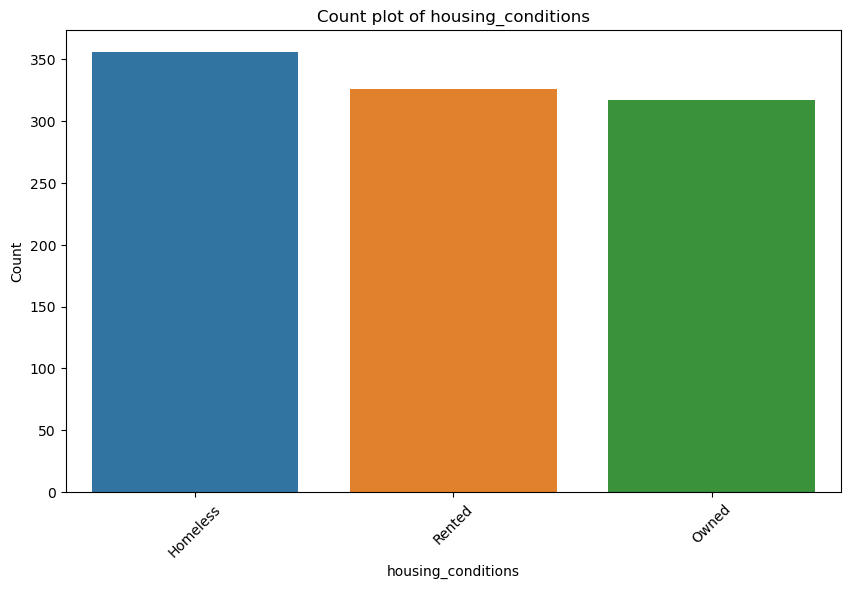

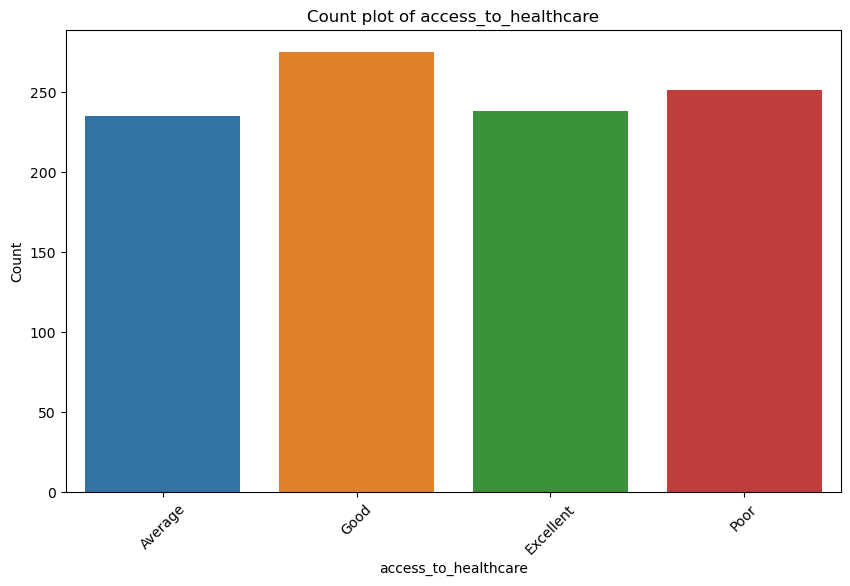

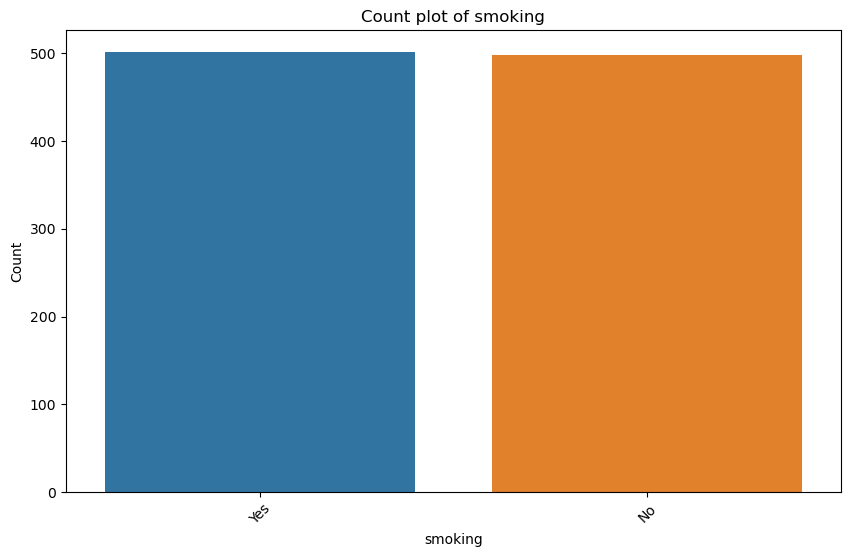

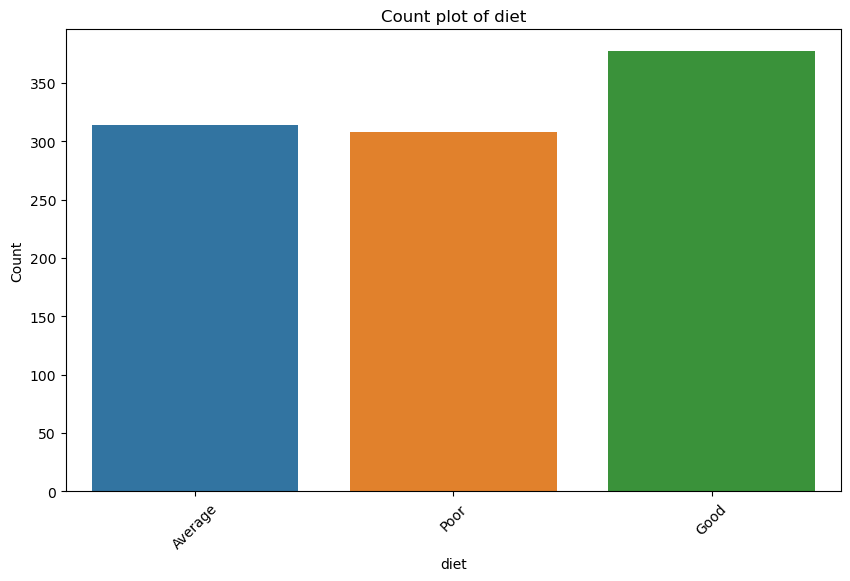

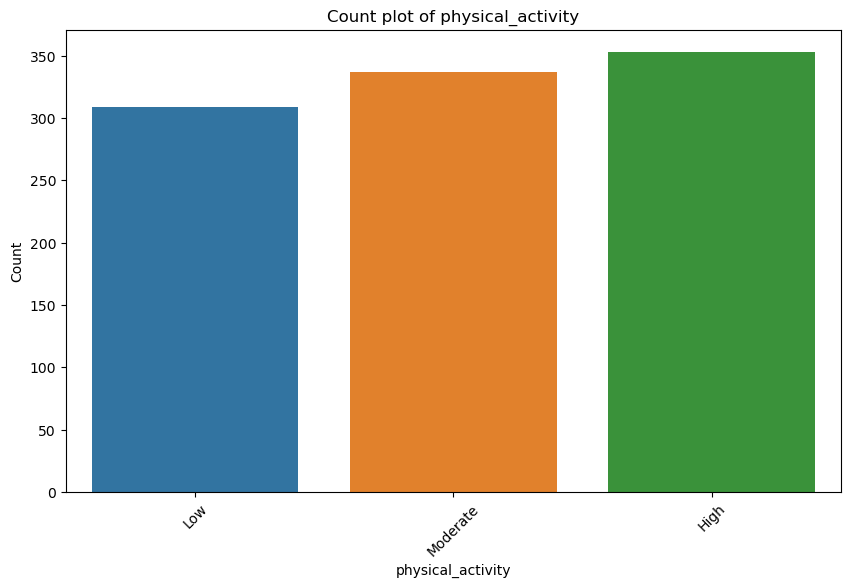

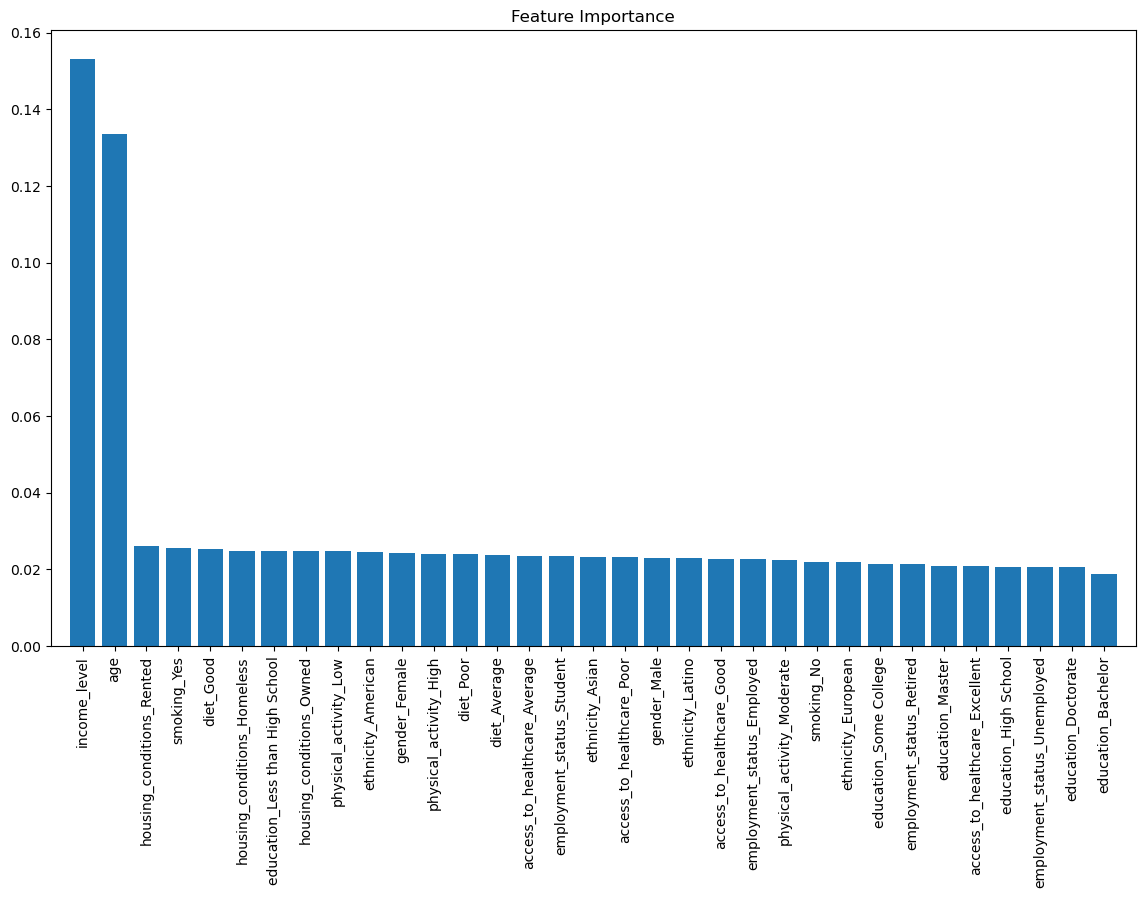

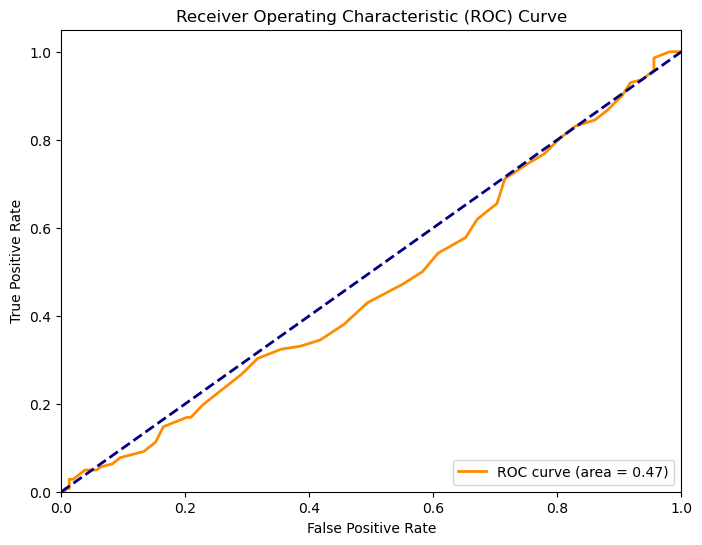

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Health.csv')

features = ['age', 'gender', 'ethnicity', 'income_level', 'education', 'employment_status', 
            'housing_conditions', 'access_to_healthcare', 'smoking', 'diet', 'physical_activity']
target = 'health_outcome'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = ['age', 'income_level']
categorical_features = ['gender', 'ethnicity', 'education', 'employment_status', 'housing_conditions', 'access_to_healthcare', 'smoking', 'diet', 'physical_activity']


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print(f"Cross-Validation AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean()}")
print(f"Standard Deviation of AUC-ROC: {cv_scores.std()}")


for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Count plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = (numeric_features + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(14, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Accuracy: 0.4666666666666667
Precision: 0.42857142857142855
Recall: 0.38028169014084506
F1 Score: 0.40298507462686567
AUC-ROC: 0.4688447138527367
Cross-Validation AUC-ROC Scores: [0.49346405 0.49203431 0.53189532 0.45839297 0.44641376]
Mean AUC-ROC: 0.48444008302564534
Standard Deviation of AUC-ROC: 0.030051811430036282

Predictions vs Actual:
     Actual  Predicted
453       1          0
793       0          1
209       0          0
309       0          0
740       0          1
..      ...        ...
314       1          1
404       0          0
7         1          0
155       1          0
809       0          1

[300 rows x 2 columns]


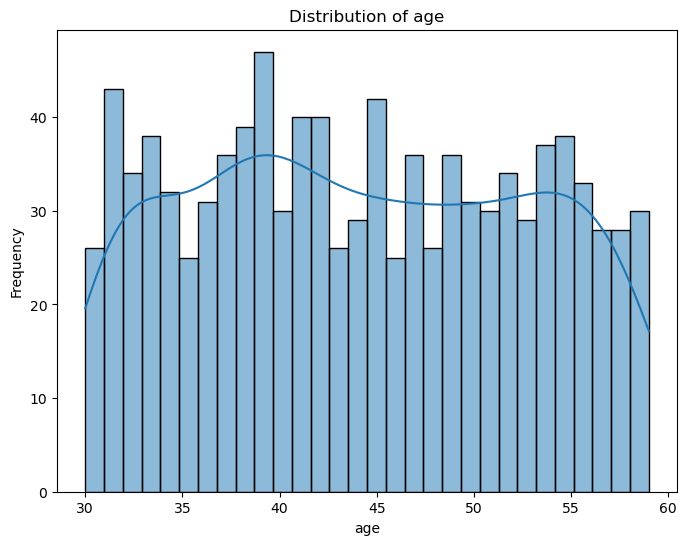

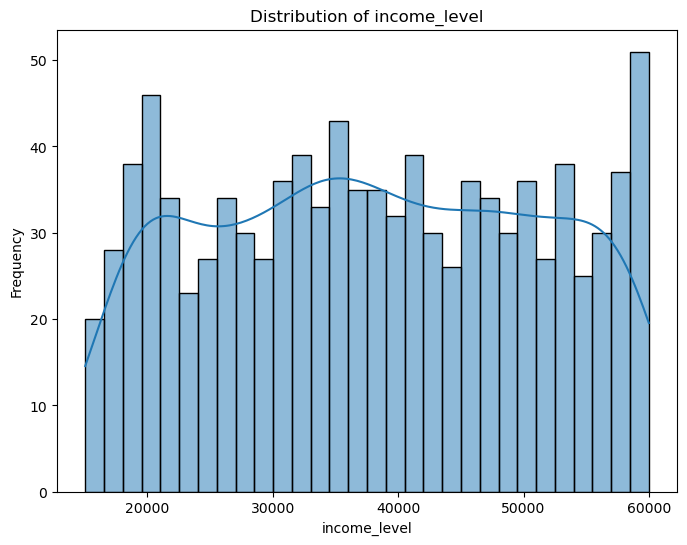

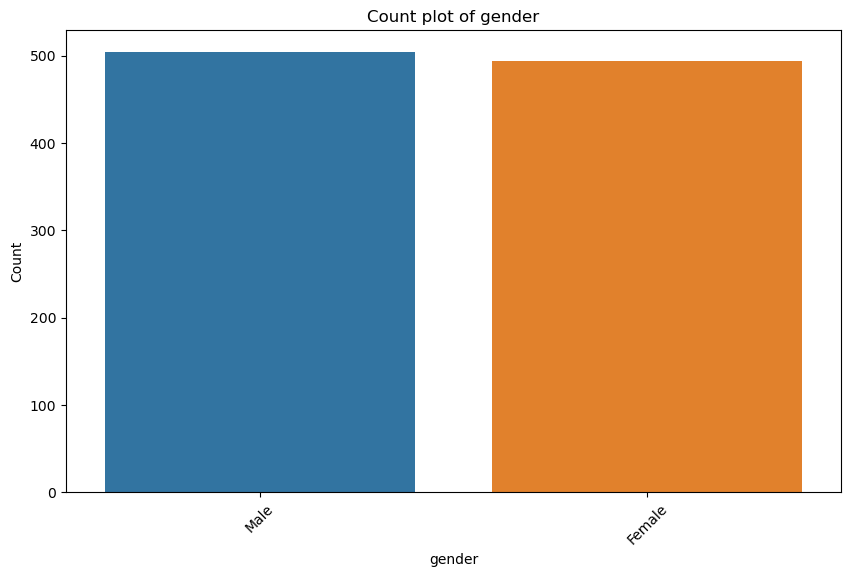

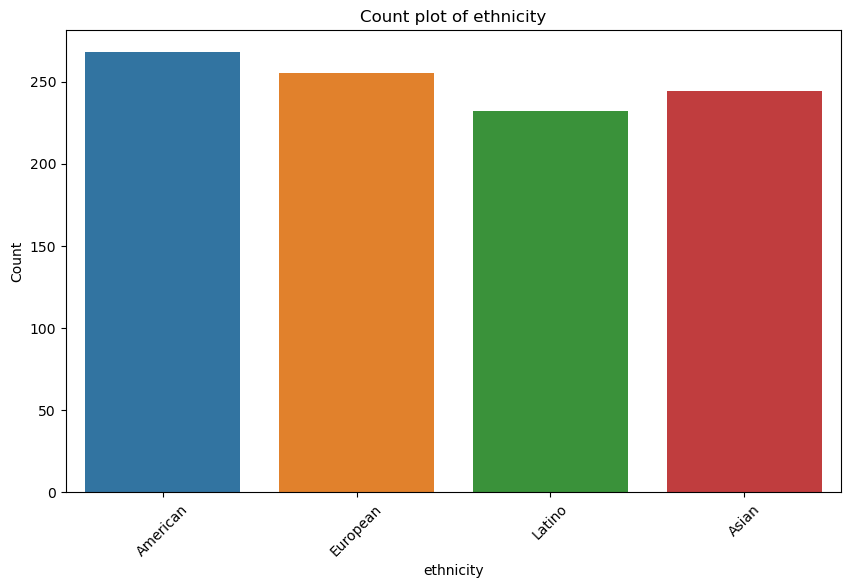

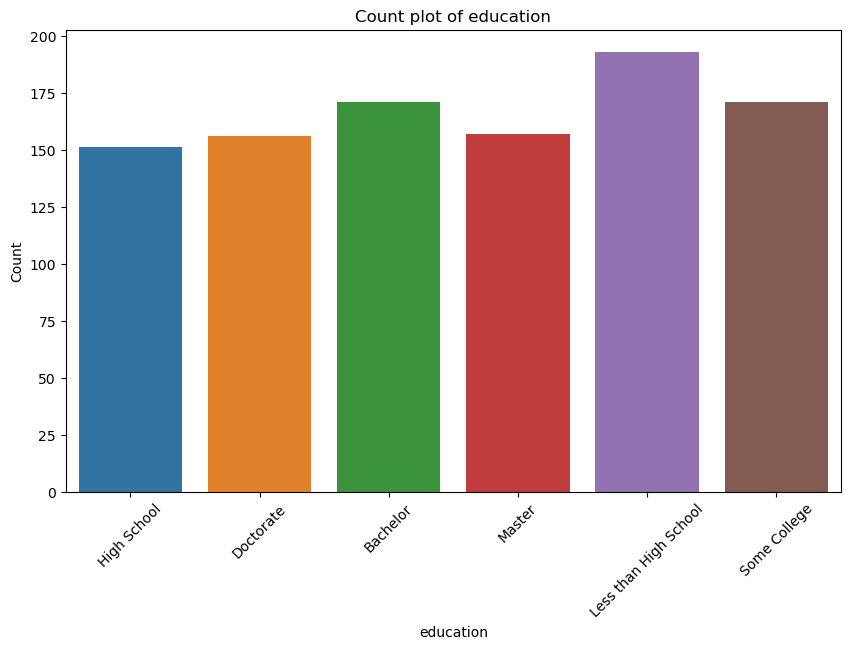

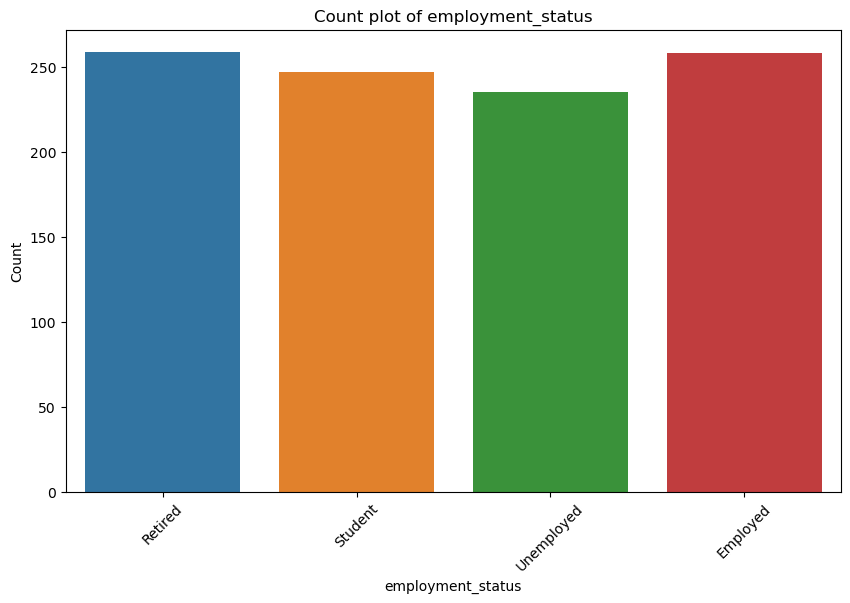

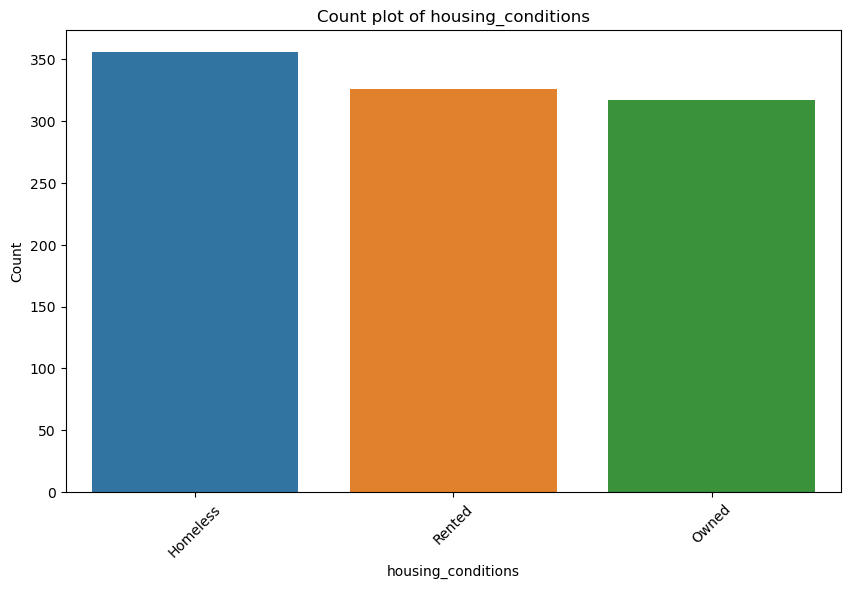

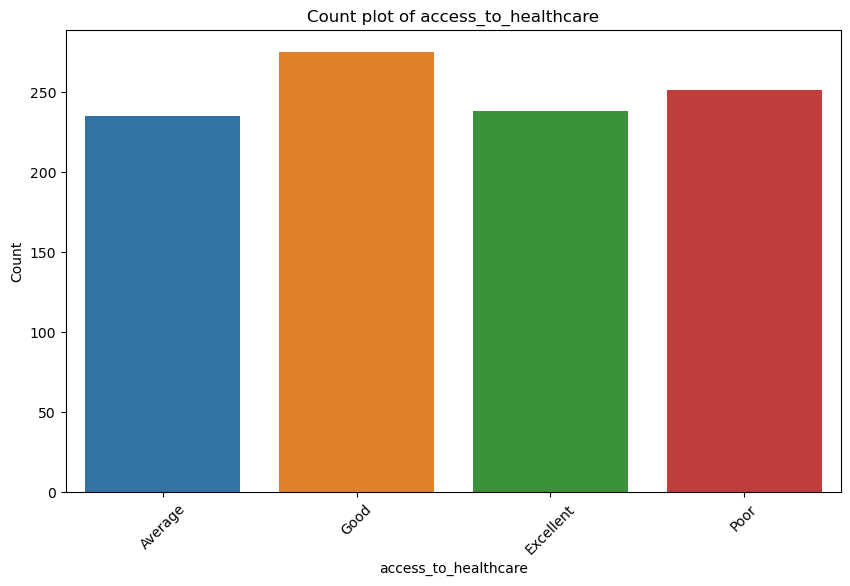

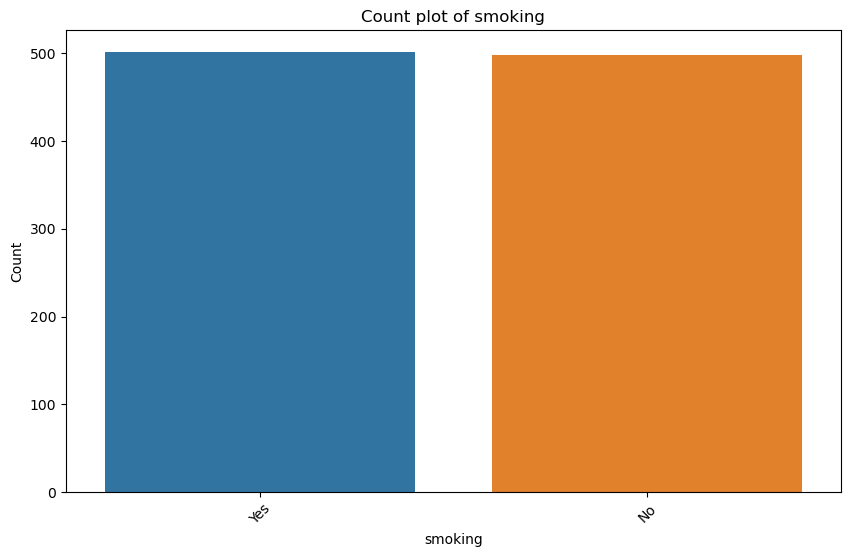

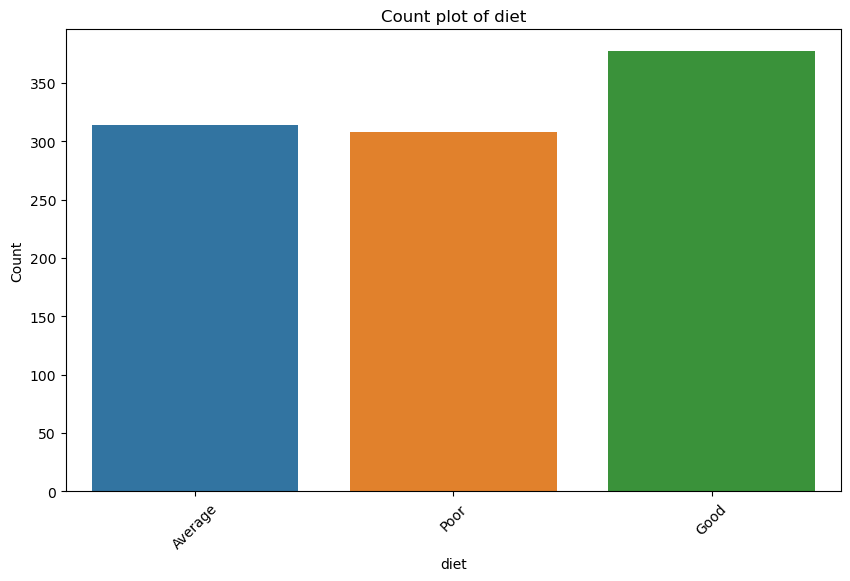

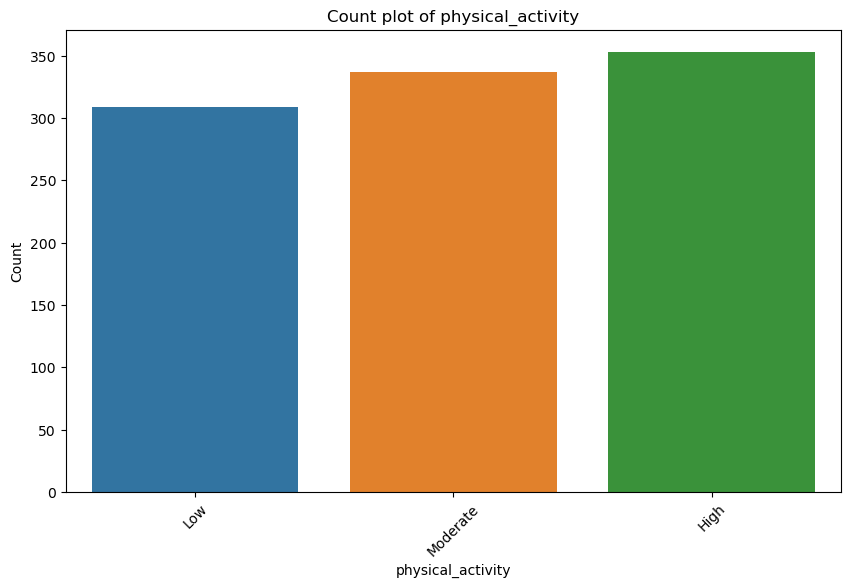

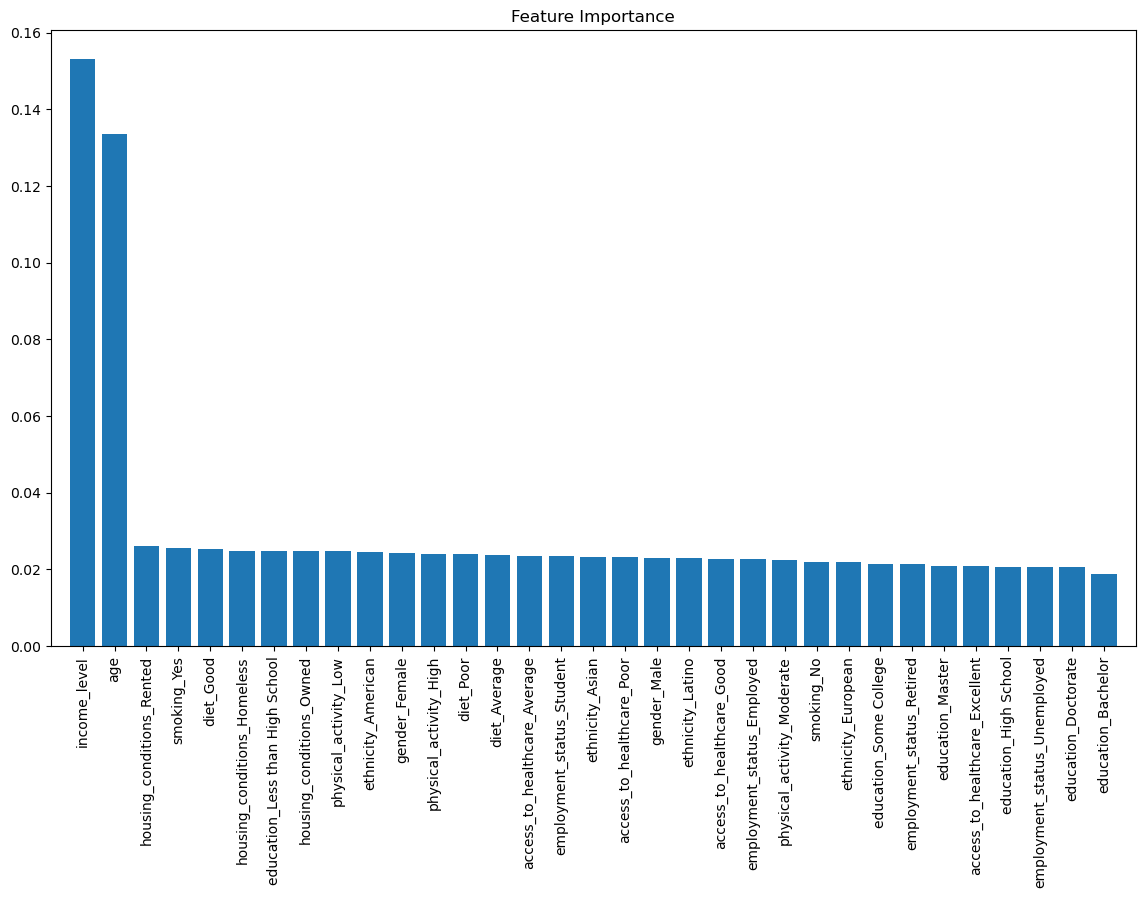

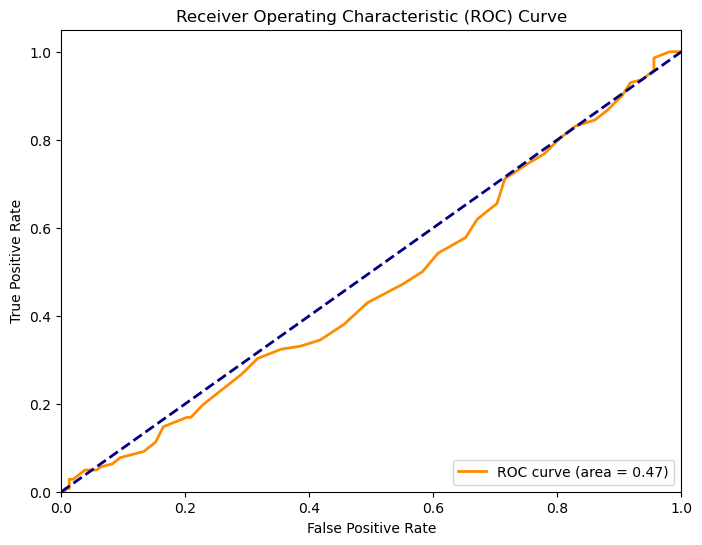

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import numpy as np

data=pd.read_csv("Health.csv")


features = ['age', 'gender', 'ethnicity', 'income_level', 'education', 'employment_status', 
            'housing_conditions', 'access_to_healthcare', 'smoking', 'diet', 'physical_activity']
target = 'health_outcome'


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


numeric_features = ['age', 'income_level']
categorical_features = ['gender', 'ethnicity', 'education', 'employment_status', 'housing_conditions', 'access_to_healthcare', 'smoking', 'diet', 'physical_activity']


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print(f"Cross-Validation AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC: {cv_scores.mean()}")
print(f"Standard Deviation of AUC-ROC: {cv_scores.std()}")


predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions vs Actual:")
print(predictions)


for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Count plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = (numeric_features + list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(14, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

